In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


# PRML Major Project

    Project Title : Toxic Comment Classification
    Team Members :  Shreshth Vatsal Sharma (B21CS094)
                    Shashank Shekhar Asthana (B21CS093)
                    Adeem Haris (B21AI004)

    
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
import time
import warnings
from sklearn.metrics import f1_score
from wordcloud import WordCloud
import re
import nltk
import string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
warnings.filterwarnings('ignore')

## Approach 1
    To classify each comment into 6 of the classes that we have and predicting the accuracy of our model

In [ ]:
#importing training and testing dataset

df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv') 


In [ ]:
df_train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:
df_test.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
freq,1,1


In [ ]:
def want_unwant(df_train,label):
  vals1, counts1 = np.unique(df_train[label] , return_counts=True)
  return(vals1, counts1)

# A function that determines how much wanted and unwanted words are there in each label

In [ ]:
labels = [ 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'] 
counts=[]
for i in labels:
  print('For',i,'the count is : ')
  vals,count = want_unwant(df_train,i)
  counts.append(count[1])
  print(want_unwant(df_train,i)[1])
  

For toxic the count is : 
[144277  15294]
For severe_toxic the count is : 
[157976   1595]
For obscene the count is : 
[151122   8449]
For threat the count is : 
[159093    478]
For insult the count is : 
[151694   7877]
For identity_hate the count is : 
[158166   1405]


    There are 15294 occurances of unwanted words in toxic label and 144277 occurances of wanted words in toxic label.
    There are 1595 occurances of unwanted words in sever_toxic label and 157976 occurances of wanted words in toxic label.
    There are 8449 occurances of unwanted words in obscene and 151122 occurances of wanted words in toxic label.
    There are 478 occurances of unwanted words in threat label and 159093 occurances of wanted words in toxic label.
    There are 7877 occurances of unwanted words in insult label and 151694 occurances of wanted words in toxic label.
    There are 1405 occurances of unwanted words in identity_hate label and 158166 occurances of wanted words in toxic label.

In [ ]:
counts

[15294, 1595, 8449, 478, 7877, 1405]

In [ ]:
df_train['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

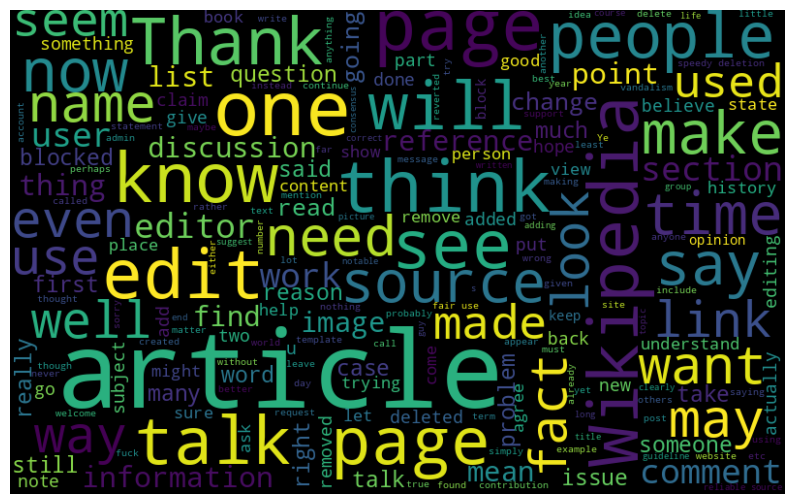

In [ ]:
words = ' '.join(df_train['comment_text'])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

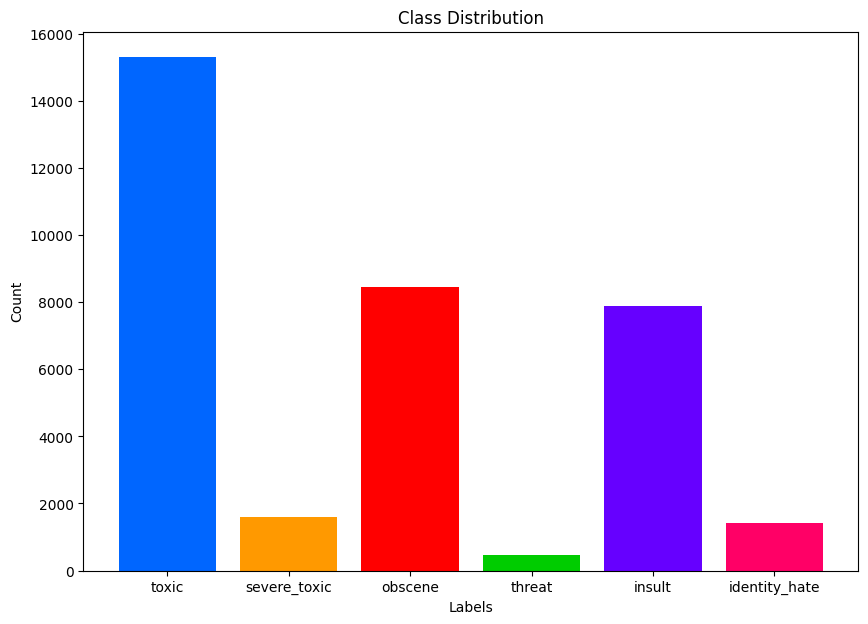

In [ ]:
plt.figure(figsize=(10, 7))
plt.bar(labels, counts, color=['#0066ff', '#ff9900', '#ff0000', '#00cc00', '#6600ff', '#ff0066'])
plt.title('Class Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [ ]:
def clean_text_data(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"I'm", "I am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub('[0-9]', '', text)
    text = re.sub("\'", "", text)
    text = re.sub(r"\S*https?:\S*", " ", text)
    text = re.sub(r"\S*www.\S*", " ", text)
    text = text.strip(' ')
    return text

df_train['comment_text'] = df_train['comment_text'].apply(clean_text_data)
df_test['comment_text'] = df_test['comment_text'].apply(clean_text_data)
df_train['comment_text'][0]    

'explanation why the edits made under my username hardcore metallica fan were reverted they were not vandalisms just closure on some gas after i voted at new york dolls fac and please do not remove the template from the talk page since i am retired now'

In [ ]:
df_train_new = df_train.drop(['id'],axis=1)

In [ ]:
df_test

,id,comment_text
0,00001cee341fdb12,yo bitch ja rule is more succesful then you wi...
1,0000247867823ef7,from rfc the title is fine as it is imo
2,00013b17ad220c46,sources zawe ashton on lapland
3,00017563c3f7919a,if you have a look back at the source the info...
4,00017695ad8997eb,i do not anonymously edit articles at all
...,...,...
153159,fffcd0960ee309b5,i totally agree this stuff is nothing but too ...
153160,fffd7a9a6eb32c16,throw from out field to home plate does it get...
153161,fffda9e8d6fafa9e,okinotorishima categories i see your changes a...
153162,fffe8f1340a79fc2,one of the founding nations of the eu germany ...


In [ ]:
df_test_new = df_test.drop(['id'],axis=1)

In [ ]:
df_train_new

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,explanation why the edits made under my userna...,0,0,0,0,0,0
1,d aww he matches this background colour i am s...,0,0,0,0,0,0
2,hey man i am really not trying to edit war it ...,0,0,0,0,0,0
3,more i cannot make any real suggestions on imp...,0,0,0,0,0,0
4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,and for the second time of asking when your vi...,0,0,0,0,0,0
159567,you should be ashamed of yourself that is a ho...,0,0,0,0,0,0
159568,spitzer umm theres no actual article for prost...,0,0,0,0,0,0
159569,and it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:
X, y1, y2, y3, y4, y5, y6 = df_train_new['comment_text'], df_train_new['toxic'], df_train_new['severe_toxic'], df_train_new['obscene'], df_train_new['threat'], df_train_new['insult'], df_train_new['identity_hate']

print(X.shape, y1.shape, y2.shape, y3.shape, y4.shape, y5.shape, y6.shape)

(159571,) (159571,) (159571,) (159571,) (159571,) (159571,) (159571,)


In [ ]:
X_train1, X_val1, y1_train, y1_val = train_test_split(X, y1, test_size=0.3, random_state=42)
X_train2, X_val2, y2_train, y2_val = train_test_split(X, y2, test_size=0.3, random_state=42)
X_train3, X_val3, y3_train, y3_val = train_test_split(X, y3, test_size=0.3, random_state=42)
X_train4, X_val4, y4_train, y4_val = train_test_split(X, y4, test_size=0.3, random_state=42)
X_train5, X_val5, y5_train, y5_val = train_test_split(X, y5, test_size=0.3, random_state=42)
X_train6, X_val6, y6_train, y6_val = train_test_split(X, y6, test_size=0.3, random_state=42)

In [ ]:
X_train1

54568     conflict of interest note by your user name it...
3786      update actually i changed this to something bl...
22938     mrca article sniperz thanks for your comments ...
137856    arguing that bart and caltrain should get more...
143038    blocked hi i blocked you for  hours for being ...
                                ...                        
119879    redirect talk john loveday experimental physicist
103694     back it up post the line here with the reference
131932    i wo not stop that sometimes germanic equals g...
146867    british bands i think you have mistaken scotti...
121958    you are wrong justin thompson is mentioned in ...
Name: comment_text, Length: 111699, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 

vectorizer = TfidfVectorizer(use_idf=True)

In [ ]:
model = make_pipeline(vectorizer, LinearSVC())
model.fit(X_train1, y1_train)
pred_val1 = model.predict(X_val1)
score1 = f1_score(y1_val, pred_val1, average='weighted')
print(score1)

0.9605560681869121


In [ ]:
model.fit(X_train2, y2_train)
pred_val2 = model.predict(X_val2)
score2 = f1_score(y2_val, pred_val2, average='weighted')
print(score2)

0.9887999542411308


In [ ]:
model.fit(X_train3, y3_train)
pred_val3 = model.predict(X_val3)
score3 = f1_score(y3_val, pred_val3, average='weighted')
print(score3)

0.9785480849738272


In [ ]:
model.fit(X_train4, y4_train)
pred_val4 = model.predict(X_val4)
score4 = f1_score(y4_val, pred_val4, average='weighted')
print(score4)

0.996877158646097


In [ ]:
model.fit(X_train5, y5_train)
pred_val5 = model.predict(X_val5)
score5 = f1_score(y5_val, pred_val5, average='weighted')
print(score5)

0.9699382317709181


In [ ]:
model.fit(X_train6, y6_train)
pred_val6 = model.predict(X_val6)
score6 = f1_score(y6_val, pred_val6, average='weighted')
print(score6)

0.9902304024265808


In [ ]:
df_test_new

,comment_text
0,yo bitch ja rule is more succesful then you wi...
1,from rfc the title is fine as it is imo
2,sources zawe ashton on lapland
3,if you have a look back at the source the info...
4,i do not anonymously edit articles at all
...,...
153159,i totally agree this stuff is nothing but too ...
153160,throw from out field to home plate does it get...
153161,okinotorishima categories i see your changes a...
153162,one of the founding nations of the eu germany ...


In [ ]:
df_test_sample = df_test.copy()

In [ ]:
df_test_sample

,id,comment_text
0,00001cee341fdb12,yo bitch ja rule is more succesful then you wi...
1,0000247867823ef7,from rfc the title is fine as it is imo
2,00013b17ad220c46,sources zawe ashton on lapland
3,00017563c3f7919a,if you have a look back at the source the info...
4,00017695ad8997eb,i do not anonymously edit articles at all
...,...,...
153159,fffcd0960ee309b5,i totally agree this stuff is nothing but too ...
153160,fffd7a9a6eb32c16,throw from out field to home plate does it get...
153161,fffda9e8d6fafa9e,okinotorishima categories i see your changes a...
153162,fffe8f1340a79fc2,one of the founding nations of the eu germany ...


In [ ]:
df_test_label = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_labels.csv')
df_test_label.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [ ]:
df_test_label_modified = df_test_label.loc[df_test_label['toxic']==-1]

In [ ]:
df_test_label_modified

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,-1,-1,-1,-1,-1,-1
153160,fffd7a9a6eb32c16,-1,-1,-1,-1,-1,-1
153161,fffda9e8d6fafa9e,-1,-1,-1,-1,-1,-1
153162,fffe8f1340a79fc2,-1,-1,-1,-1,-1,-1


In [ ]:
df_test_label['comment_text'] = df_test_sample['comment_text']

In [ ]:
df_test_label

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1,yo bitch ja rule is more succesful then you wi...
1,0000247867823ef7,-1,-1,-1,-1,-1,-1,from rfc the title is fine as it is imo
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1,sources zawe ashton on lapland
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1,if you have a look back at the source the info...
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1,i do not anonymously edit articles at all
...,...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,-1,-1,-1,-1,-1,-1,i totally agree this stuff is nothing but too ...
153160,fffd7a9a6eb32c16,-1,-1,-1,-1,-1,-1,throw from out field to home plate does it get...
153161,fffda9e8d6fafa9e,-1,-1,-1,-1,-1,-1,okinotorishima categories i see your changes a...
153162,fffe8f1340a79fc2,-1,-1,-1,-1,-1,-1,one of the founding nations of the eu germany ...


In [ ]:
df_test_modified = df_test_label.loc[df_test_label['toxic']!=-1]

In [ ]:
df_test_modified

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text
5,0001ea8717f6de06,0,0,0,0,0,0,thank you for understanding i think very highl...
7,000247e83dcc1211,0,0,0,0,0,0,dear god this site is horrible
11,0002f87b16116a7f,0,0,0,0,0,0,somebody will invariably try to add religion r...
13,0003e1cccfd5a40a,0,0,0,0,0,0,it says it right there that it is a type the t...
14,00059ace3e3e9a53,0,0,0,0,0,0,before adding a new product to the list make s...
...,...,...,...,...,...,...,...,...
153150,fff8f64043129fa2,0,0,0,0,0,0,jerome i see you never got around to this i m ...
153151,fff9d70fe0722906,0,0,0,0,0,0,lucky bastard http wikimediafoundation org wik...
153154,fffa8a11c4378854,0,0,0,0,0,0,shame on you all you want to speak about gays ...
153155,fffac2a094c8e0e2,1,0,1,0,1,0,mel gibson is a nazi bitch who makes shitty mo...


In [ ]:
test_labels = df_test_modified.drop(columns=['comment_text'])

In [ ]:
X_test_modified = df_test_modified.drop(columns=labels)

In [ ]:
X_test_modified = X_test_modified.drop(columns = ['id'])

In [ ]:
X_test_modified

,comment_text
5,thank you for understanding i think very highl...
7,dear god this site is horrible
11,somebody will invariably try to add religion r...
13,it says it right there that it is a type the t...
14,before adding a new product to the list make s...
...,...
153150,jerome i see you never got around to this i m ...
153151,lucky bastard http wikimediafoundation org wik...
153154,shame on you all you want to speak about gays ...
153155,mel gibson is a nazi bitch who makes shitty mo...


In [ ]:
y1_test_modified = df_test_modified['toxic']
y2_test_modified = df_test_modified['severe_toxic']
y3_test_modified = df_test_modified['obscene']
y4_test_modified = df_test_modified['threat']
y5_test_modified = df_test_modified['insult']
y6_test_modified = df_test_modified['identity_hate']

In [ ]:
y1_test_modified.shape

(63978,)

In [ ]:
X_test_modified['comment_text'] = X_test_modified['comment_text'].apply(clean_text_data)

In [ ]:
model = make_pipeline(vectorizer, LinearSVC())
model.fit(X_train1, y1_train)
pred_test1 = model.predict(X_test_modified['comment_text'])
pred_test1.shape
score1_test = f1_score(y1_test_modified, pred_test1, average='weighted')
print(score1_test)

0.9331103948796279


In [ ]:
model = make_pipeline(vectorizer, LinearSVC())
model.fit(X_train2, y2_train)
pred_test2 = model.predict(X_test_modified['comment_text'])
score2_test = f1_score(y2_test_modified, pred_test2, average='weighted')
print(score2_test)

0.9927841413502237


In [ ]:
model = make_pipeline(vectorizer, LinearSVC())
model.fit(X_train3, y3_train)
pred_test3 = model.predict(X_test_modified['comment_text'])
score3_test = f1_score(y3_test_modified, pred_test3, average='weighted')
print(score3_test)

0.9648491464917518


In [ ]:
model = make_pipeline(vectorizer, LinearSVC())
model.fit(X_train4, y4_train)
pred_test4 = model.predict(X_test_modified['comment_text'])
score4_test = f1_score(y4_test_modified, pred_test4, average='weighted')
print(score4_test)

0.9964513127311974


In [ ]:
model = make_pipeline(vectorizer, LinearSVC())
model.fit(X_train5, y5_train)
pred_test5 = model.predict(X_test_modified['comment_text'])
score5_test = f1_score(y5_test_modified, pred_test5, average='weighted')
print(score5_test)

0.9613078270180452


In [ ]:
model = make_pipeline(vectorizer, LinearSVC())
model.fit(X_train6, y6_train)
pred_test6 = model.predict(X_test_modified['comment_text'])
score6_test = f1_score(y6_test_modified, pred_test6, average='weighted')
print(score6_test)

0.9885079119200145


In [ ]:
X_pred = X_test_modified.copy()

In [ ]:
X_pred['toxic'] = pred_test1
X_pred['severe_toxic'] = pred_test2
X_pred['obscene'] = pred_test3
X_pred['threat'] = pred_test4
X_pred['insult'] = pred_test5
X_pred['identity_hate'] = pred_test6

In [ ]:
X_pred

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,thank you for understanding i think very highl...,0,0,0,0,0,0
7,dear god this site is horrible,1,0,0,0,0,0
11,somebody will invariably try to add religion r...,0,0,0,0,0,0
13,it says it right there that it is a type the t...,0,0,0,0,0,0
14,before adding a new product to the list make s...,0,0,0,0,0,0
...,...,...,...,...,...,...,...
153150,jerome i see you never got around to this i m ...,0,0,0,0,0,0
153151,lucky bastard http wikimediafoundation org wik...,1,0,0,0,1,0
153154,shame on you all you want to speak about gays ...,1,0,0,0,0,0
153155,mel gibson is a nazi bitch who makes shitty mo...,1,0,1,0,1,0


In [ ]:
X_pred_copy = X_pred.copy()
X_pred_copy = X_pred_copy.drop(columns=["comment_text"])
test_labels = test_labels.drop(columns=["id"])

In [ ]:
c=0
for i in range(len(X_pred_copy)) :
  if(X_pred_copy.to_numpy()[i].all() == test_labels.to_numpy()[i].all()) :
    c+=1
print("Accuracy for the Test dataset : " , c/len(X_pred))

Accuracy for the Test dataset :  0.9997811747788302


In [ ]:
for j in range(1,7) :
  c=0
  for i in range(len(X_pred)) :
    if(X_pred.to_numpy()[i][j] == 1) : c+=1
  print("Probability for a comment to be {} : ".format(labels[j-1]) , c/len(X_pred))

Probability for a comment to be toxic :  0.12324549063740661
Probability for a comment to be severe_toxic :  0.004657851136328113
Probability for a comment to be obscene :  0.05426865485010472
Probability for a comment to be threat :  0.0018912751258245023
Probability for a comment to be insult :  0.04104535934227391
Probability for a comment to be identity_hate :  0.00497045859514208


## Approach 2
    To Predict the probability of each type of toxicity for each comment.
---

In [ ]:
df_train_prob = df_train.copy()
df_test_prob = df_test.copy()

In [ ]:
df_train_prob

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i am s...,0,0,0,0,0,0
2,000113f07ec002fd,hey man i am really not trying to edit war it ...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i cannot make any real suggestions on imp...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when your vi...,0,0,0,0,0,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ho...,0,0,0,0,0,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for prost...,0,0,0,0,0,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:
df_train_prob.shape

(159571, 8)

In [ ]:
df_train_prob.set_index('id')

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,,
0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
000103f0d9cfb60f,d aww he matches this background colour i am s...,0,0,0,0,0,0
000113f07ec002fd,hey man i am really not trying to edit war it ...,0,0,0,0,0,0
0001b41b1c6bb37e,more i cannot make any real suggestions on imp...,0,0,0,0,0,0
0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0
...,...,...,...,...,...,...,...
ffe987279560d7ff,and for the second time of asking when your vi...,0,0,0,0,0,0
ffea4adeee384e90,you should be ashamed of yourself that is a ho...,0,0,0,0,0,0
ffee36eab5c267c9,spitzer umm theres no actual article for prost...,0,0,0,0,0,0


In [ ]:
df_train_prob['text length'] = df_train_prob['comment_text'].apply(len)

<Axes: xlabel='text length', ylabel='Density'>

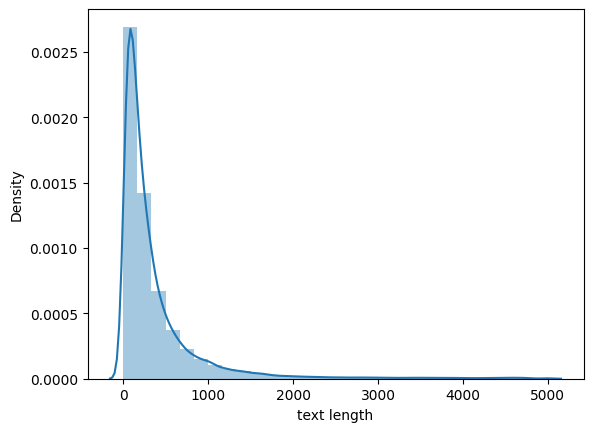

In [ ]:
sns.distplot(a=df_train_prob['text length'],bins=30)

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

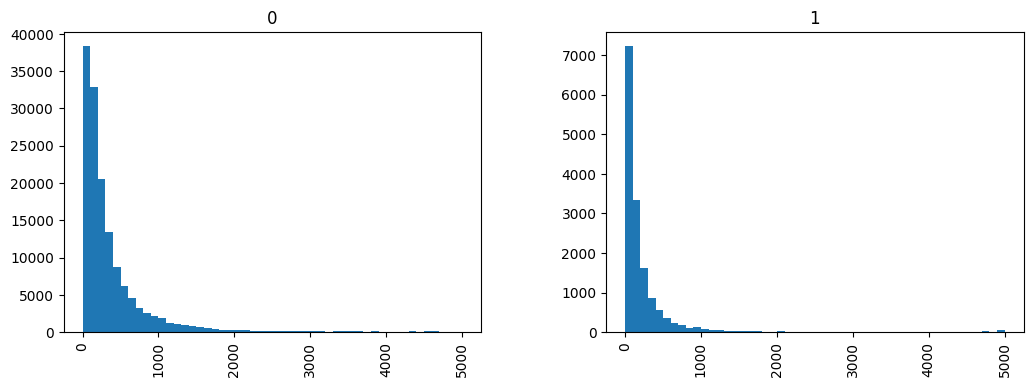

In [ ]:
df_train_prob.hist(column='text length', by='toxic', bins=50,figsize=(12,4))

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

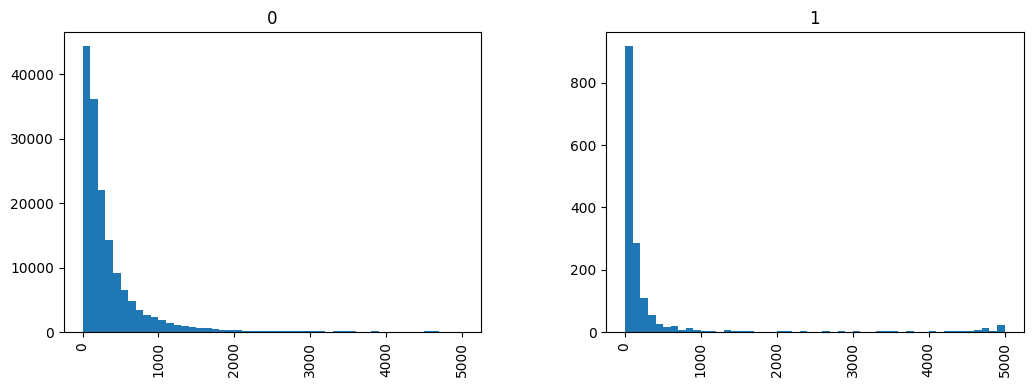

In [ ]:
df_train_prob.hist(column='text length', by='severe_toxic', bins=50,figsize=(12,4))

In [ ]:
df_train_prob['comment_text'].isnull().sum()

0

In [ ]:
df_train_prob.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,text length
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,251
1,000103f0d9cfb60f,d aww he matches this background colour i am s...,0,0,0,0,0,0,93
2,000113f07ec002fd,hey man i am really not trying to edit war it ...,0,0,0,0,0,0,228
3,0001b41b1c6bb37e,more i cannot make any real suggestions on imp...,0,0,0,0,0,0,600
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,61


In [ ]:
tfidf_vec = TfidfVectorizer(max_df=0.7,stop_words='english')

In [ ]:
X_prob = df_train_prob['comment_text']
y_prob = df_train_prob['toxic']

X_train_prob, X_test_prob, y_train_prob, y_test_prob = train_test_split(X_prob, y_prob, test_size=0.33, random_state=42)

X_train_vec = tfidf_vec.fit_transform(X_train_prob)
X_test_vec = tfidf_vec.transform(X_test_prob)

log_prob = LogisticRegression()
log_prob.fit(X_train_vec,y_train_prob)

predictions = log_prob.predict(X_test_vec)
print(confusion_matrix(y_test_prob,predictions))
print(classification_report(y_test_prob,predictions))

[[47324   252]
 [ 2162  2921]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     47576
           1       0.92      0.57      0.71      5083

    accuracy                           0.95     52659
   macro avg       0.94      0.78      0.84     52659
weighted avg       0.95      0.95      0.95     52659



In [ ]:
X_prob = df_train_prob['comment_text']
y_prob = df_train_prob['severe_toxic']

X_train_prob, X_test_prob, y_train_prob, y_test_prob = train_test_split(X_prob, y_prob, test_size=0.33, random_state=42)

X_train_vec = tfidf_vec.fit_transform(X_train_prob)
X_test_vec = tfidf_vec.transform(X_test_prob)

log_st_prob = LogisticRegression()
log_st_prob.fit(X_train_vec,y_train_prob)

predictions = log_st_prob.predict(X_test_vec)
print(confusion_matrix(y_test_prob,predictions))
print(classification_report(y_test_prob,predictions))

[[52047    86]
 [  394   132]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     52133
           1       0.61      0.25      0.35       526

    accuracy                           0.99     52659
   macro avg       0.80      0.62      0.68     52659
weighted avg       0.99      0.99      0.99     52659



In [ ]:
X_prob = df_train_prob['comment_text']
y_prob = df_train_prob['obscene']

X_train_prob, X_test_prob, y_train_prob, y_test_prob = train_test_split(X_prob, y_prob, test_size=0.33, random_state=42)

X_train_vec = tfidf_vec.fit_transform(X_train_prob)
X_test_vec = tfidf_vec.transform(X_test_prob)

log_obs_prob = LogisticRegression()
log_obs_prob.fit(X_train_vec,y_train_prob)

predictions = log_obs_prob.predict(X_test_vec)
print(confusion_matrix(y_test_prob,predictions))
print(classification_report(y_test_prob,predictions))

[[49694   134]
 [ 1121  1710]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     49828
           1       0.93      0.60      0.73      2831

    accuracy                           0.98     52659
   macro avg       0.95      0.80      0.86     52659
weighted avg       0.98      0.98      0.97     52659



In [ ]:
X_prob = df_train_prob['comment_text']
y_prob = df_train_prob['threat']

X_train_prob, X_test_prob, y_train_prob, y_test_prob = train_test_split(X_prob, y_prob, test_size=0.33, random_state=42)

X_train_vec = tfidf_vec.fit_transform(X_train_prob)
X_test_vec = tfidf_vec.transform(X_test_prob)

log_thr_prob = LogisticRegression()
log_thr_prob.fit(X_train_vec,y_train_prob)

predictions = log_thr_prob.predict(X_test_vec)
print(confusion_matrix(y_test_prob,predictions))
print(classification_report(y_test_prob,predictions))

[[52498     9]
 [  129    23]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52507
           1       0.72      0.15      0.25       152

    accuracy                           1.00     52659
   macro avg       0.86      0.58      0.62     52659
weighted avg       1.00      1.00      1.00     52659



In [ ]:
X_prob = df_train_prob['comment_text']
y_prob = df_train_prob['insult']

X_train_prob, X_test_prob, y_train_prob, y_test_prob = train_test_split(X_prob, y_prob, test_size=0.33, random_state=42)

X_train_vec = tfidf_vec.fit_transform(X_train_prob)
X_test_vec = tfidf_vec.transform(X_test_prob)

log_ins_prob = LogisticRegression()
log_ins_prob.fit(X_train_vec,y_train_prob)

predictions = log_ins_prob.predict(X_test_vec)
print(confusion_matrix(y_test_prob,predictions))
print(classification_report(y_test_prob,predictions))

[[49741   275]
 [ 1357  1286]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     50016
           1       0.82      0.49      0.61      2643

    accuracy                           0.97     52659
   macro avg       0.90      0.74      0.80     52659
weighted avg       0.97      0.97      0.97     52659



In [ ]:
X_prob = df_train_prob['comment_text']
y_prob = df_train_prob['identity_hate']

X_train_prob, X_test_prob, y_train_prob, y_test_prob = train_test_split(X_prob, y_prob, test_size=0.33, random_state=42)

X_train_vec = tfidf_vec.fit_transform(X_train_prob)
X_test_vec = tfidf_vec.transform(X_test_prob)

log_ih_prob = LogisticRegression()
log_ih_prob.fit(X_train_vec,y_train_prob)

predictions = log_ih_prob.predict(X_test_vec)
print(confusion_matrix(y_test_prob,predictions))
print(classification_report(y_test_prob,predictions))

[[52158    30]
 [  399    72]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     52188
           1       0.71      0.15      0.25       471

    accuracy                           0.99     52659
   macro avg       0.85      0.58      0.62     52659
weighted avg       0.99      0.99      0.99     52659



In [ ]:
df_test_prob.head()

,id,comment_text
0,00001cee341fdb12,yo bitch ja rule is more succesful then you wi...
1,0000247867823ef7,from rfc the title is fine as it is imo
2,00013b17ad220c46,sources zawe ashton on lapland
3,00017563c3f7919a,if you have a look back at the source the info...
4,00017695ad8997eb,i do not anonymously edit articles at all


In [ ]:
df_test1 = df_test_prob['comment_text']
df_test1_vec = tfidf_vec.transform(df_test1)

In [ ]:
prob_toxic = log_prob.predict_proba(df_test1_vec)
prob_stoxic = log_st_prob.predict_proba(df_test1_vec)
prob_obscene = log_obs_prob.predict_proba(df_test1_vec)
prob_threat = log_thr_prob.predict_proba(df_test1_vec)
prob_insult = log_ins_prob.predict_proba(df_test1_vec)
prob_ihate = log_ih_prob.predict_proba(df_test1_vec)

In [ ]:
df1 = pd.DataFrame(prob_toxic[:,1],columns=['toxic'])
df2 = pd.DataFrame(prob_stoxic[:,1],columns=['severe_toxic'])
df3 = pd.DataFrame(prob_obscene[:,1],columns=['obscene'])
df4 = pd.DataFrame(prob_threat[:,1],columns=['threat'])
df5 = pd.DataFrame(prob_insult[:,1],columns=['insult'])
df6 = pd.DataFrame(prob_ihate[:,1],columns=['identity_hate'])

In [ ]:
df7 = pd.concat([df_test_prob['id'],df1,df2,df3,df4,df5,df6],axis=1)

In [ ]:
df7.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.988647,0.139330,0.983676,0.019002,0.886226,0.181682
1,0000247867823ef7,0.012250,0.003172,0.009919,0.001867,0.009773,0.004332
2,00013b17ad220c46,0.049077,0.004940,0.020324,0.002134,0.024120,0.005806
3,00017563c3f7919a,0.003179,0.001980,0.003329,0.001488,0.003255,0.001173
4,00017695ad8997eb,0.034149,0.003152,0.010504,0.001927,0.012764,0.003618


In [ ]:
df7.set_index('id',inplace=True)

In [ ]:
df7.head() #Final prediction of probabilities of each type of toxicity labels in each comment

,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,
00001cee341fdb12,0.988647,0.139330,0.983676,0.019002,0.886226,0.181682
0000247867823ef7,0.012250,0.003172,0.009919,0.001867,0.009773,0.004332
00013b17ad220c46,0.049077,0.004940,0.020324,0.002134,0.024120,0.005806
00017563c3f7919a,0.003179,0.001980,0.003329,0.001488,0.003255,0.001173
00017695ad8997eb,0.034149,0.003152,0.010504,0.001927,0.012764,0.003618
